BMI Calculator Part 2

In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict


In [2]:
#define State
class BMIState(TypedDict):
    weight_kg:float
    height_m:float
    bmi:float
    category:str

In [4]:
def cal_bmi(state: BMIState) ->BMIState:
    #print(f"DEBUG: Current state keys: {state.keys()}")
    weight=state['weight_kg']
    height=state['height_m']

    bmi=weight/(height**2)

    state['bmi']=round(bmi,2)

    return state


In [5]:
def label_bmi(state: BMIState) ->BMIState:
    
    bmi=state['bmi']

    if bmi<18.5:
        state['category']='underweight'
    elif 18.5<=bmi<25:
        state['category']='Normal'
    elif 25<=bmi<30:
        state['category']='Overweight'
    else:
        state['category']='Obese'
    return state

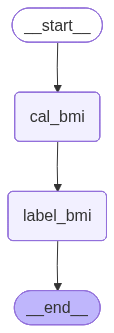

In [6]:
#define graph and pass state
graph = StateGraph(BMIState)

#add nodes to the graph
graph.add_node('cal_bmi', cal_bmi)
graph.add_node('label_bmi', label_bmi)

#add edges to the graph
graph.add_edge(START, 'cal_bmi')
graph.add_edge('cal_bmi', 'label_bmi')
graph.add_edge('label_bmi', END)

#compile the graph, just to check structure
workflow = graph.compile()

#execute the graph
workflow

In [9]:
#execute the graph

initial_state = {'weight_kg': 98.0, 'height_m': 1.76}
final_state = workflow.invoke(initial_state)

print(final_state)

{'weight_kg': 98.0, 'height_m': 1.76, 'bmi': 31.64, 'category': 'Obese'}
